In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

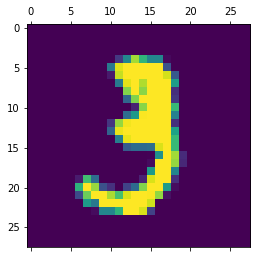

In [6]:
plt.matshow(X_train[10])

In [7]:
Y_train[10]

3

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [10]:
X_test_flattened.shape

(10000, 784)

In [11]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 583us/step - loss: 0.4719 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 1s 536us/step - loss: 0.3042 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 1s 541us/step - loss: 0.2838 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 1s 504us/step - loss: 0.2735 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 1s 510us/step - loss: 0.2665 - accuracy: 0.9258


In [13]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 459us/step - loss: 0.2678 - accuracy: 0.9248


[0.2677949368953705, 0.9247999787330627]

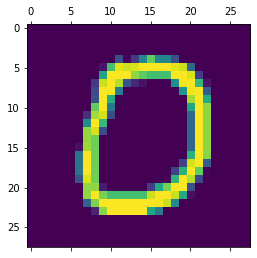

In [14]:
plt.matshow(X_test[10])

In [15]:
Y_predicted = model.predict(X_test_flattened)
np.argmax(Y_predicted[10])

0

In [16]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)

In [18]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 948,    0,    1,    1,    0,    9,   12,    4,    4,    1],
       [   0, 1113,    3,    2,    0,    2,    4,    2,    9,    0],
       [   3,    9,  916,   15,    9,    6,   14,   11,   46,    3],
       [   2,    0,   18,  909,    1,   36,    2,   12,   25,    5],
       [   1,    1,    2,    1,  926,    0,   13,    4,   10,   24],
       [   7,    2,    1,   22,    9,  795,   16,    4,   30,    6],
       [   6,    3,    4,    1,    7,   15,  918,    2,    2,    0],
       [   1,    6,   22,    4,    6,    0,    0,  961,    4,   24],
       [   3,    9,    6,   16,    9,   38,    8,   13,  868,    4],
       [   8,    7,    1,    8,   38,   11,    0,   32,   10,  894]])>

Text(69.0, 0.5, 'truth')

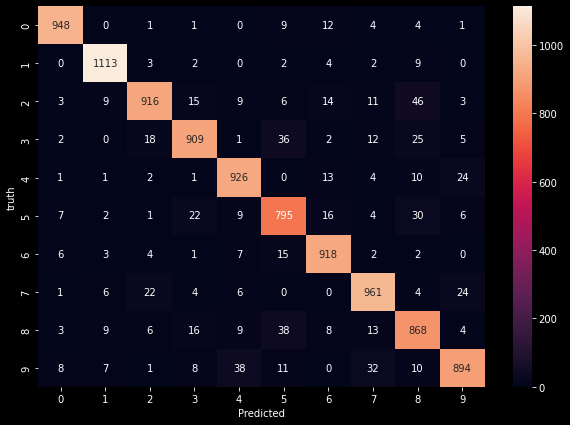

In [19]:
import seaborn as sn
plt.style.use('dark_background')
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')


In [20]:
model1 = keras.Sequential([
    keras.layers.Dense(120,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 666us/step - loss: 0.2561 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 1s 667us/step - loss: 0.1135 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 1s 662us/step - loss: 0.0804 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 1s 662us/step - loss: 0.0602 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 1s 659us/step - loss: 0.0456 - accuracy: 0.9857


Text(69.0, 0.5, 'truth')

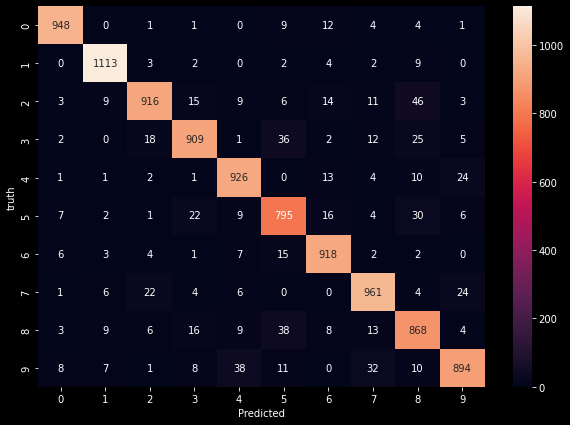

In [21]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)

import seaborn as sn
plt.style.use('dark_background')
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 728us/step - loss: 0.2816 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 1s 654us/step - loss: 0.1301 - accuracy: 0.96220s - loss: 0.141
Epoch 3/5
1875/1875 [==============================] - 1s 650us/step - loss: 0.0920 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 1s 642us/step - loss: 0.0695 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 1s 640us/step - loss: 0.0551 - accuracy: 0.9831
